In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register

register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False}
)
env = gym.make('FrozenLake-v3')

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Success rate: 0.921
Final Q-Table Values
LEFT DOWN RIGHT UP
[[0.      0.      0.59049 0.     ]
 [0.      0.      0.6561  0.     ]
 [0.      0.729   0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.81    0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.9     0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      1.      0.     ]
 [0.      0.      0.      0.     ]]


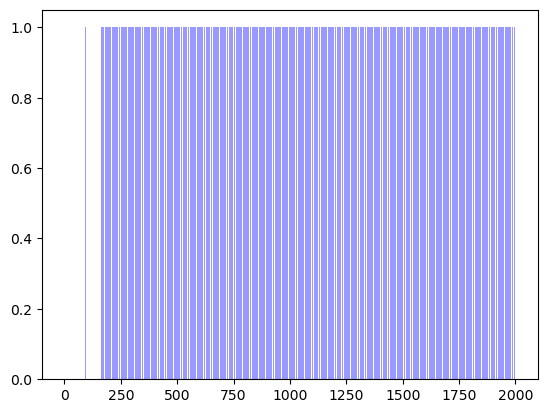

In [2]:
# Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Set learning parameters
dis = 0.9
num_episodes = 2000

# create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()[0]
    rAll = 0
    done = False

    # The Q-Table learning algorithm
    while not done:
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1))

        # Get new state and reward from environment
        new_state, reward, done, _, info  = env.step(action)

        # Update Q-Table with new knowledge using learning rate
        Q[state, action] = reward + dis * np.max(Q[new_state, :])
        state = new_state

        rAll += reward

    rList.append(rAll)

print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color='b', alpha=0.4)
plt.show()